In [29]:
import pandas as pd
import numpy as np
from lightfm import LightFM

%matplotlib inline

# Collaborative Filtering

Development of the wine recommendation engine.

In [45]:
data = pd.read_pickle('../pkl/00_wine_dot_com_data_combined.pkl')
reviews = pd.read_pickle('../pkl/00_wine_dot_com_review_combined.pkl')

reviews = reviews.loc[reviews.author != 'Anonymous']
reviews['rating'] = reviews.rating.astype(int)
reviews['date'] = pd.to_datetime(reviews.date)

In [47]:
data.shape, reviews.shape

((8620, 11), (6343, 8))

In [21]:
reviews.head(2)

,author,date,location,rating,review,style,url,url_no
0,colbyalbo,2016-05-20,"Lafayette, LA",5,An aromatic bouquet of contrasting flavors. Re...,Light & Fruity,http://www.wine.com/v6/Schug-Sonoma-Coast-Pino...,0
1,CParks,2016-01-28,"San Francisco, CA",5,,,http://www.wine.com/v6/Schug-Sonoma-Coast-Pino...,0


In [22]:
reviews.author.nunique(), reviews.url_no.nunique()

(2920, 2219)

Handle duplicates.

In [26]:
reviews[['author','url_no','rating']].shape[0], reviews[['author','url_no','rating']].drop_duplicates().shape[0]

(6343, 6325)

In [30]:
all_index = reviews[['author','url_no','rating']].index
dedupe_index = reviews[['author','url_no','rating']].drop_duplicates().index

In [31]:
mask = np.invert(all_index.isin(dedupe_index))
reviews.loc[mask, ['author','url_no','rating']]

,author,url_no,rating
621,Omar Stradella,7678,5


In [33]:
len(all_index), len(dedupe_index)

(6343, 6325)

In [ ]:
.pivot('author','url_no','rating').head(1).T

In [ ]:
model = LightFM(loss='warp')

In [19]:

author_reviews = reviews.author.value_counts().sort_values(ascending=False)

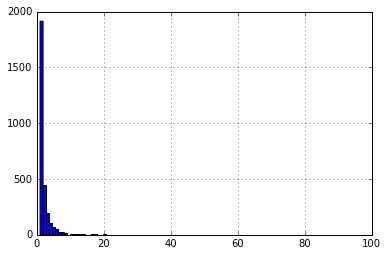

In [21]:
author_reviews.hist(bins=100)

In [22]:
reviews.head()

,author,date,location,rating,review,style,url,url_no
0,colbyalbo,5/20/2016,"Lafayette, LA",5,An aromatic bouquet of contrasting flavors. Re...,Light & Fruity,http://www.wine.com/v6/Schug-Sonoma-Coast-Pino...,0
1,CParks,1/28/2016,"San Francisco, CA",5,,,http://www.wine.com/v6/Schug-Sonoma-Coast-Pino...,0
2,J2YAY,2/16/2016,"San Francisco, CA",2,,,http://www.wine.com/v6/Schug-Sonoma-Coast-Pino...,0
4,dcsallade,8/1/2016,"Pittsburgh, PA",4,,,http://www.wine.com/v6/Schug-Sonoma-Coast-Pino...,0
5,0fhashii,7/31/2016,"Fairfield, CT",4,,,http://www.wine.com/v6/Schug-Sonoma-Coast-Pino...,0


In [51]:
mask = data.wine.str.contains('ducated')
data.loc[mask]

,color,image,kind,rating,region,review,url,url_no,wine,winery,year
8,red,http://cdn.fluidretail.net/customers/c1477/14/...,Merlot,NaN,"Napa Valley, California","The latest wine from Roots Run Deep Winery, Ed...",http://www.wine.com/v6/Roots-Run-Deep-Educated...,1308.0,Roots Run Deep Educated Guess Merlot,Roots Run Deep Winery,2013
92,white,//cache.wine.com/labels/159983l.jpg,Chardonnay,1048.5,"Napa Valley, California",By combining the characteristics that both tra...,http://www.wine.com/v6/Roots-Run-Deep-Educated...,6492.0,Roots Run Deep Educated Guess Chardonnay,Roots Run Deep Winery,2014
35,red,http://cdn.fluidretail.net/customers/c1477/15/...,Cabernet Sauvignon,1051.5,"Napa Valley, California","This wine is rich, ripe, and focused with juic...",http://www.wine.com/v6/Roots-Run-Deep-Educated...,535.0,Roots Run Deep Educated Guess Cabernet Sauvignon,Roots Run Deep Winery,2014
65,red,//cache.wine.com/labels/146464l.jpg,Pinot Noir,NaN,"Carneros, California",Our Pinot Noir is truly a labor of love. Handc...,http://www.wine.com/v6/Roots-Run-Deep-Educated...,1765.0,Roots Run Deep Educated Guess Pinot Noir,Roots Run Deep Winery,2013


In [54]:
mask = reviews.url_no==8
reviews.loc[mask]

,author,date,location,rating,review,style,url,url_no
138,ljube172,2016-08-19,"Pittsburgh, PA",3,,,http://www.wine.com/v6/Calcu-Cabernet-Sauvigno...,8


In [55]:
mask = reviews.author=='ljube172'
reviews.loc[mask]

,author,date,location,rating,review,style,url,url_no
138,ljube172,2016-08-19,"Pittsburgh, PA",3,,,http://www.wine.com/v6/Calcu-Cabernet-Sauvigno...,8
